In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
# upload csv in here

data = pd.read_csv('HanceRapoluFullMatch.csv')
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', None)
data.head(100)

,pointScore,gameScore,setScore,isPointStart,pointStartTime,isPointEnd,pointEndTime,shotInRally,side,serverName,firstServeIn,firstServeZone,firstServeXCoord,firstServeYCoord,secondServeIn,secondServeZone,secondServeXCoord,secondServeYCoord,returnContactX,returnContactY,returnPlacementX,returnPlacementY,shotContactX,shotContactY,shotType,isVolley,isApproach,isDropshot,shotLocationX,shotLocationY,isWinner,isErrorWideR,isErrorWideL,isErrorNet,isErrorLong,pointNumber,clientTeam,Date,Division,Event,lineupPosition,player1Name,player2Name,Round,Surface,Notes,shotDirection,shotFhBh,tiebreakScore,returnData,returnerName,shotHitBy
0,0-0,0-0,0-0,1.0,9486.0,NaN,NaN,1,Deuce,Malaika Rapolu,0.0,T,NaN,NaN,1.0,Body,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,UCLA,1/20/24,D1,NaN,2.0,Kimmi Hance,Malaika Rapolu,NaN,Hard,Did till 51:22 / 2:09:22,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu
1,0-0,0-0,0-0,NaN,NaN,NaN,NaN,2,NaN,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,30-30 point in 3-5 game missing,Crosscourt,Forehand,NaN,Forehand Crosscourt,Kimmi Hance,Kimmi Hance
2,0-0,0-0,0-0,NaN,NaN,NaN,NaN,3,NaN,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forehand Down the Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Forehand,NaN,NaN,Kimmi Hance,Malaika Rapolu
3,0-0,0-0,0-0,NaN,NaN,NaN,NaN,4,NaN,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forehand Down the Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Forehand,NaN,NaN,Kimmi Hance,Kimmi Hance
4,0-0,0-0,0-0,NaN,NaN,NaN,NaN,5,NaN,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forehand Crosscourt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Crosscourt,Forehand,NaN,NaN,Kimmi Hance,Malaika Rapolu
5,0-0,0-0,0-0,NaN,NaN,NaN,NaN,6,NaN,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forehand Down the Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Forehand,NaN,NaN,Kimmi Hance,Kimmi Hance
6,0-0,0-0,0-0,NaN,NaN,NaN,NaN,7,NaN,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Backhand Crosscourt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Crosscourt,Backhand,NaN,NaN,Kimmi Hance,Malaika Rapolu
7,0-0,0-0,0-0,NaN,NaN,1.0,48070.0,8,NaN,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Backhand Down the Line,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Backhand,NaN,NaN,Kimmi Hance,Kimmi Hance
8,0-15,0-0,0-0,1.0,75253.0,NaN,NaN,1,Ad,Malaika Rapolu,1.0,Wide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu
9,0-15,0-0,0-0,NaN,NaN,1.0,80405.0,2,NaN,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Backhand,NaN,Backhand Down the Line,Kimmi Hance,Kimmi Hance


In [40]:
data['side'].fillna(method = 'ffill', inplace = True)
for i in range(0, len(data)):
    if data['firstServeIn'].iloc[i] == 1:
        data['secondServeIn'].iloc[i] = 0
data['firstServeIn'].fillna(method = 'ffill', inplace = True)
data['secondServeIn'].fillna(method = 'ffill', inplace = True)

/Users/danielneufeldt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [41]:
winner = [np.nan for _ in range(len(data))]
player_1 = data['player1Name'][0]
player_2 = data['player2Name'][0]
for i in range(0, len(data)):
    if data['isPointEnd'][i] == 1:
        if data['shotHitBy'][i] == player_1:
            if data['isWinner'][i] == 1:
                winner[i] = player_1
            else:
                winner[i] = player_2
        else:
            if data['isWinner'][i] == 1:
                winner[i] = player_2
            else:
                winner[i] = player_1
data['winner'] = winner

In [47]:
data_filtered = data[['pointScore', 'isPointEnd', 'side', 'serverName', 'firstServeIn', 'secondServeIn',
                     'shotFhBh', 'returnerName', 'winner']]
data_filtered = data_filtered[(data_filtered['isPointEnd'] == 1) & 
                              (data_filtered['shotFhBh'].isin(['Forehand', 'Backhand']))]
data_filtered.head(20)

,pointScore,isPointEnd,side,serverName,firstServeIn,secondServeIn,shotFhBh,returnerName,winner
7,0-0,1.0,Deuce,Malaika Rapolu,0.0,1.0,Backhand,Kimmi Hance,Kimmi Hance
9,0-15,1.0,Ad,Malaika Rapolu,1.0,0.0,Backhand,Kimmi Hance,Malaika Rapolu
12,15-15,1.0,Deuce,Malaika Rapolu,0.0,1.0,Forehand,Kimmi Hance,Kimmi Hance
23,15-30,1.0,Ad,Malaika Rapolu,0.0,1.0,Forehand,Kimmi Hance,Kimmi Hance
37,15-40,1.0,Deuce,Malaika Rapolu,0.0,1.0,Forehand,Kimmi Hance,Malaika Rapolu
41,30-40,1.0,Ad,Malaika Rapolu,1.0,0.0,Forehand,Kimmi Hance,Malaika Rapolu
48,40-40,1.0,Ad,Malaika Rapolu,1.0,0.0,Backhand,Kimmi Hance,Kimmi Hance
51,0-0,1.0,Deuce,Kimmi Hance,1.0,0.0,Forehand,Malaika Rapolu,Malaika Rapolu
62,0-15,1.0,Ad,Kimmi Hance,1.0,0.0,Forehand,Malaika Rapolu,Malaika Rapolu
65,0-30,1.0,Deuce,Kimmi Hance,1.0,0.0,Backhand,Malaika Rapolu,Malaika Rapolu


In [70]:
# use this area to manually change any discrepancies, such as NaN values in pointScore or missing lines

h = '(' + str(80) + ')'
h

'(80)'

In [60]:
player_1_first = data_filtered[(data_filtered['firstServeIn'] == 1) &
                              (data_filtered['returnerName'] == player_1)]
player_1_second = data_filtered[(data_filtered['secondServeIn'] == 1) &
                              (data_filtered['returnerName'] == player_1)]
player_2_first = data_filtered[(data_filtered['firstServeIn'] == 1) &
                              (data_filtered['returnerName'] == player_2)]
player_2_second = data_filtered[(data_filtered['secondServeIn'] == 1) &
                              (data_filtered['returnerName'] == player_2)]

In [88]:
player_1_first['winner'] = player_1_first['winner'].replace(player_1, 1).replace(player_2, 0)
player_1_first_ad = player_1_first[player_1_first['side'] == 'Ad']
player_1_first_deuce = player_1_first[player_1_first['side'] == 'Deuce']

player_1_first_forehand_ad = player_1_first_ad[player_1_first_ad['shotFhBh'] == 'Forehand']
player_1_first_forehand_deuce = player_1_first_deuce[player_1_first_deuce['shotFhBh'] == 'Forehand']

player_1_first_backhand_ad = player_1_first_ad[player_1_first_ad['shotFhBh'] == 'Backhand']
player_1_first_backhand_deuce = player_1_first_deuce[player_1_first_deuce['shotFhBh'] == 'Backhand']

values_1 = ["" for _ in range(8)]
values_1_text = ["" for _ in range(8)]

print('Player statistics for ', player_1)

if len(player_1_first_forehand_ad) > 0:
    player_1_first_forehand_win_percentage_ad = round(sum(player_1_first_forehand_ad['winner']) / len(player_1_first_forehand_ad), 2)
    print('Forehand First Serve Return Win (Ad): ', player_1_first_forehand_win_percentage_ad,
         '(', sum(player_1_first_forehand_ad['winner']), '/', len(player_1_first_forehand_ad), ')')
    values_1[0] = player_1_first_forehand_win_percentage_ad
    values_1_text[0] = '(' + str(sum(player_1_first_forehand_ad['winner'])) + '/' + str(len(player_1_first_forehand_ad)) + ')'
else:
    print('No data available for Forehand First Serve Return Win (Ad)')
    values_1[0] = np.nan
    values_1_text[0] = 'NA'

if len(player_1_first_forehand_deuce) > 0:
    player_1_first_forehand_win_percentage_deuce = round(sum(player_1_first_forehand_deuce['winner']) / len(player_1_first_forehand_deuce), 2)
    print('Forehand First Serve Return Win (Deuce): ', player_1_first_forehand_win_percentage_deuce,
         '(', sum(player_1_first_forehand_deuce['winner']), '/', len(player_1_first_forehand_deuce), ')')
    values_1[4] = player_1_first_forehand_win_percentage_deuce
    values_1_text[4] = '(' + str(sum(player_1_first_forehand_deuce['winner'])) + '/' + str(len(player_1_first_forehand_deuce)) + ')'
else:
    print('No data available for Forehand First Serve Return Win (Deuce)')
    values_1[4] = np.nan
    values_1_text[4] = 'NA'

if len(player_1_first_backhand_ad) > 0:
    player_1_first_backhand_win_percentage_ad = round(sum(player_1_first_backhand_ad['winner']) / len(player_1_first_backhand_ad), 2)
    print('Backhand First Serve Return Win (Ad): ', player_1_first_backhand_win_percentage_ad,
         '(', sum(player_1_first_backhand_ad['winner']), '/', len(player_1_first_backhand_ad), ')')
    values_1[2] = player_1_first_backhand_win_percentage_ad
    values_1_text[2] = '(' + str(sum(player_1_first_backhand_ad['winner'])) + '/' + str(len(player_1_first_backhand_ad)) + ')'
else:
    print('No data available for Backhand First Serve Return Win (Ad)')
    values_1[2] = np.nan
    values_1_text[2] = 'NA'
    
if len(player_1_first_backhand_deuce) > 0:
    player_1_first_backhand_win_percentage_deuce = round(sum(player_1_first_backhand_deuce['winner']) / len(player_1_first_backhand_deuce), 2)
    print('Backhand First Serve Return Win (Deuce): ', player_1_first_backhand_win_percentage_deuce,
         '(', sum(player_1_first_backhand_deuce['winner']), '/', len(player_1_first_backhand_deuce), ')')
    values_1[6] = player_1_first_backhand_win_percentage_deuce
    values_1_text[6] = '(' + str(sum(player_1_first_backhand_deuce['winner'])) + '/' + str(len(player_1_first_backhand_deuce)) + ')'

else:
    print('No data available for Backhand First Serve Return Win (Deuce)')
    values_1[6] = np.nan
    values_1_text[6] = 'NA'

player_1_second['winner'] = player_1_second['winner'].replace(player_1, 1).replace(player_2, 0)
player_1_second_ad = player_1_second[player_1_second['side'] == 'Ad']
player_1_second_deuce = player_1_second[player_1_second['side'] == 'Deuce']
player_1_second_forehand_ad = player_1_second_ad[player_1_second_ad['shotFhBh'] == 'Forehand']
player_1_second_forehand_deuce = player_1_second_deuce[player_1_second_deuce['shotFhBh'] == 'Forehand']
player_1_second_backhand_ad = player_1_second_ad[player_1_second_ad['shotFhBh'] == 'Backhand']
player_1_second_backhand_deuce = player_1_second_deuce[player_1_second_deuce['shotFhBh'] == 'Backhand']

if len(player_1_second_forehand_ad) > 0:
    player_1_second_forehand_win_percentage_ad = round(sum(player_1_second_forehand_ad['winner']) / len(player_1_second_forehand_ad), 2)
    print('Forehand Second Serve Return Win (Ad): ', player_1_second_forehand_win_percentage_ad,
          '(', sum(player_1_second_forehand_ad['winner']), '/', len(player_1_second_forehand_ad), ')')
    values_1[1] = player_1_second_forehand_win_percentage_ad
    values_1_text[1] = '(' + str(sum(player_1_second_forehand_ad['winner'])) + '/' + str(len(player_1_second_forehand_ad)) + ')'
    
else:
    print('No data available for Forehand Second Serve Return Win (Ad)')
    values_1[1] = np.nan
    values_1_text[1] = 'NA'
    
if len(player_1_second_forehand_deuce) > 0:
    player_1_second_forehand_win_percentage_deuce = round(sum(player_1_second_forehand_deuce['winner']) / len(player_1_second_forehand_deuce), 2)
    print('Forehand Second Serve Return Win (Deuce): ', player_1_second_forehand_win_percentage_deuce,
         '(', sum(player_1_second_forehand_deuce['winner']), '/', len(player_1_second_forehand_deuce), ')')
    values_1[5] = player_1_second_forehand_win_percentage_deuce
    values_1_text[5] = '(' + str(sum(player_1_second_forehand_deuce['winner'])) + '/' + str(len(player_1_second_forehand_deuce)) + ')'

else:
    print('No data available for Forehand Second Serve Return Win (Deuce)')
    values_1[5] = np.nan
    values_1_text[5] = 'NA'

if len(player_1_second_backhand_ad) > 0:
    player_1_second_backhand_win_percentage_ad = round(sum(player_1_second_backhand_ad['winner']) / len(player_1_second_backhand_ad), 2)
    print('Backhand Second Serve Return Win (Ad): ', player_1_second_backhand_win_percentage_ad,
         '(', sum(player_1_second_backhand_ad['winner']), '/', len(player_1_second_backhand_ad), ')')
    values_1[3] = player_1_second_backhand_win_percentage_ad
    values_1_text[3] = '(' + str(sum(player_1_second_backhand_ad['winner'])) + '/' + str(len(player_1_second_backhand_ad)) + ')'

else:
    print('No data available for Backhand Second Serve Return Win (Ad)')
    values_1[3] = np.nan
    values_1_text[3] = 'NA'

if len(player_1_second_backhand_deuce) > 0:
    player_1_second_backhand_win_percentage_deuce = round(sum(player_1_second_backhand_deuce['winner']) / len(player_1_second_backhand_deuce), 2)
    print('Backhand Second Serve Return Win (Deuce): ', player_1_second_backhand_win_percentage_deuce,
         '(', sum(player_1_second_backhand_deuce['winner']), '/', len(player_1_second_backhand_deuce), ')')
    values_1[7] = player_1_second_backhand_win_percentage_deuce
    values_1_text[7] = '(' + str(sum(player_1_second_backhand_deuce['winner'])) + '/' + str(len(player_1_second_backhand_deuce)) + ')'

else:
    print('No data available for Backhand Second Serve Return Win (Deuce)')
    values_1[7] = np.nan
    values_1_text[7] = 'NA'

Player statistics for  Kimmi Hance
Forehand First Serve Return Win (Ad):  0.35 ( 7 / 20 )
Forehand First Serve Return Win (Deuce):  0.43 ( 6 / 14 )
Backhand First Serve Return Win (Ad):  0.46 ( 6 / 13 )
Backhand First Serve Return Win (Deuce):  0.27 ( 3 / 11 )
Forehand Second Serve Return Win (Ad):  0.5 ( 6 / 12 )
Forehand Second Serve Return Win (Deuce):  0.17 ( 1 / 6 )
Backhand Second Serve Return Win (Ad):  0.43 ( 3 / 7 )
Backhand Second Serve Return Win (Deuce):  0.78 ( 7 / 9 )


/var/folders/q2/d3fzkpt9329d688rdfsqblfc0000gn/T/ipykernel_15190/3154962106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_1_first['winner'] = player_1_first['winner'].replace(player_1, 1).replace(player_2, 0)
/var/folders/q2/d3fzkpt9329d688rdfsqblfc0000gn/T/ipykernel_15190/3154962106.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_1_second['winner'] = player_1_second['winner'].replace(player_1, 1).replace(player_2, 0)


In [87]:
player_2_first['winner'] = player_2_first['winner'].replace(player_2, 1).replace(player_1, 0)
player_2_first_ad = player_2_first[player_2_first['side'] == 'Ad']
player_2_first_deuce = player_2_first[player_2_first['side'] == 'Deuce']

player_2_first_forehand_ad = player_2_first_ad[player_2_first_ad['shotFhBh'] == 'Forehand']
player_2_first_forehand_deuce = player_2_first_deuce[player_2_first_deuce['shotFhBh'] == 'Forehand']

player_2_first_backhand_ad = player_2_first_ad[player_2_first_ad['shotFhBh'] == 'Backhand']
player_2_first_backhand_deuce = player_2_first_deuce[player_2_first_deuce['shotFhBh'] == 'Backhand']

values_2 = ["" for _ in range(8)]
values_2_text = ["" for _ in range(8)]

print('Player statistics for ', player_2)

if len(player_2_first_forehand_ad) > 0:
    player_2_first_forehand_win_percentage_ad = round(sum(player_2_first_forehand_ad['winner']) / len(player_2_first_forehand_ad), 2)
    print('Forehand First Serve Return Win (Ad): ', player_2_first_forehand_win_percentage_ad,
         '(', sum(player_2_first_forehand_ad['winner']), '/', len(player_2_first_forehand_ad), ')')
    values_2[0] = player_2_first_forehand_win_percentage_ad
    values_2_text[0] = '(' + str(sum(player_2_first_forehand_ad['winner'])) + '/' + str(len(player_2_first_forehand_ad)) + ')'

else:
    print('No data available for Forehand First Serve Return Win (Ad)')
    values_2[0] = np.nan
    values_2_text[0] = 'NA'


if len(player_2_first_forehand_deuce) > 0:
    player_2_first_forehand_win_percentage_deuce = round(sum(player_2_first_forehand_deuce['winner']) / len(player_2_first_forehand_deuce), 2)
    print('Forehand First Serve Return Win (Deuce): ', player_2_first_forehand_win_percentage_deuce,
         '(', sum(player_2_first_forehand_deuce['winner']), '/', len(player_2_first_forehand_deuce), ')')
    values_2[4] = player_2_first_forehand_win_percentage_deuce
    values_2_text[4] = '(' + str(sum(player_2_first_forehand_deuce['winner'])) + '/' + str(len(player_2_first_forehand_deuce)) + ')'

else:
    print('No data available for Forehand First Serve Return Win (Deuce)')
    values_2[4] = np.nan
    values_2_text[4] = 'NA'

if len(player_2_first_backhand_ad) > 0:
    player_2_first_backhand_win_percentage_ad = round(sum(player_2_first_backhand_ad['winner']) / len(player_2_first_backhand_ad), 2)
    print('Backhand First Serve Return Win (Ad): ', player_2_first_backhand_win_percentage_ad,
         '(', sum(player_2_first_backhand_ad['winner']), '/', len(player_2_first_backhand_ad), ')')
    values_2[2] = player_2_first_backhand_win_percentage_ad
    values_2_text[2] = '(' + str(sum(player_2_first_backhand_ad['winner'])) + '/' + str(len(player_2_first_backhand_ad)) + ')'

else:
    print('No data available for Backhand First Serve Return Win (Ad)')
    values_2[2] = np.nan
    values_2_text[2] = 'NA'
    
if len(player_2_first_backhand_deuce) > 0:
    player_2_first_backhand_win_percentage_deuce = round(sum(player_2_first_backhand_deuce['winner']) / len(player_2_first_backhand_deuce), 2)
    print('Backhand First Serve Return Win (Deuce): ', player_2_first_backhand_win_percentage_deuce,
         '(', sum(player_2_first_backhand_deuce['winner']), '/', len(player_2_first_backhand_deuce), ')')
    values_2[6] = player_2_first_backhand_win_percentage_deuce
    values_2_text[6] = '(' + str(sum(player_2_first_backhand_deuce['winner'])) + '/' + str(len(player_2_first_backhand_deuce)) + ')'

else:
    print('No data available for Backhand First Serve Return Win (Deuce)')
    values_2[6] = np.nan
    values_2_text[6] = 'NA'

player_2_second['winner'] = player_2_second['winner'].replace(player_2, 1).replace(player_1, 0)
player_2_second_ad = player_2_second[player_2_second['side'] == 'Ad']
player_2_second_deuce = player_2_second[player_2_second['side'] == 'Deuce']
player_2_second_forehand_ad = player_2_second_ad[player_2_second_ad['shotFhBh'] == 'Forehand']
player_2_second_forehand_deuce = player_2_second_deuce[player_2_second_deuce['shotFhBh'] == 'Forehand']
player_2_second_backhand_ad = player_2_second_ad[player_2_second_ad['shotFhBh'] == 'Backhand']
player_2_second_backhand_deuce = player_2_second_deuce[player_2_second_deuce['shotFhBh'] == 'Backhand']

if len(player_2_second_forehand_ad) > 0:
    player_2_second_forehand_win_percentage_ad = round(sum(player_2_second_forehand_ad['winner']) / len(player_2_second_forehand_ad), 2)
    print('Forehand Second Serve Return Win (Ad): ', player_2_second_forehand_win_percentage_ad,
          '(', sum(player_2_second_forehand_ad['winner']), '/', len(player_2_second_forehand_ad), ')')
    values_2[1] = player_2_second_forehand_win_percentage_ad
    values_2_text[1] = '(' + str(sum(player_2_second_forehand_ad['winner'])) + '/' + str(len(player_2_second_forehand_ad)) + ')'

else:
    print('No data available for Forehand Second Serve Return Win (Ad)')
    values_2[1] = np.nan
    values_2_text[1] = 'NA'
    
if len(player_2_second_forehand_deuce) > 0:
    player_2_second_forehand_win_percentage_deuce = round(sum(player_2_second_forehand_deuce['winner']) / len(player_2_second_forehand_deuce), 2)
    print('Forehand Second Serve Return Win (Deuce): ', player_2_second_forehand_win_percentage_deuce,
         '(', sum(player_2_second_forehand_deuce['winner']), '/', len(player_2_second_forehand_deuce), ')')
    values_2[5] = player_2_second_forehand_win_percentage_deuce
    values_2_text[5] = '(' + str(sum(player_2_second_forehand_deuce['winner'])) + '/' + str(len(player_2_second_forehand_deuce)) + ')'

else:
    print('No data available for Forehand Second Serve Return Win (Deuce)')
    values_2[5] = np.nan
    values_2_text[5] = 'NA'

if len(player_2_second_backhand_ad) > 0:
    player_2_second_backhand_win_percentage_ad = round(sum(player_2_second_backhand_ad['winner']) / len(player_2_second_backhand_ad), 2)
    print('Backhand Second Serve Return Win (Ad): ', player_2_second_backhand_win_percentage_ad,
         '(', sum(player_2_second_backhand_ad['winner']), '/', len(player_2_second_backhand_ad), ')')
    values_2[3] = player_2_second_backhand_win_percentage_ad
    values_2_text[3] = '(' + str(sum(player_2_second_backhand_ad['winner'])) + '/' + str(len(player_2_second_backhand_ad)) + ')'

else:
    print('No data available for Backhand Second Serve Return Win (Ad)')
    values_2[3] = np.nan
    values_2_text[3] = 'NA'

if len(player_2_second_backhand_deuce) > 0:
    player_2_second_backhand_win_percentage_deuce = round(sum(player_2_second_backhand_deuce['winner']) / len(player_2_second_backhand_deuce), 2)
    print('Backhand Second Serve Return Win (Deuce): ', player_2_second_backhand_win_percentage_deuce,
         '(', sum(player_2_second_backhand_deuce['winner']), '/', len(player_2_second_backhand_deuce), ')')
    values_2[7] = player_2_second_backhand_win_percentage_deuce
    values_2_text[7] = '(' + str(sum(player_2_second_backhand_deuce['winner'])) + '/' + str(len(player_2_second_backhand_deuce)) + ')'

else:
    print('No data available for Backhand Second Serve Return Win (Deuce)')
    values_2[7] = np.nan
    values_2_text[7] = 'NA'

Player statistics for  Malaika Rapolu
Forehand First Serve Return Win (Ad):  0.47 ( 7 / 15 )
Forehand First Serve Return Win (Deuce):  0.55 ( 6 / 11 )
Backhand First Serve Return Win (Ad):  0.17 ( 1 / 6 )
Backhand First Serve Return Win (Deuce):  1.0 ( 5 / 5 )
Forehand Second Serve Return Win (Ad):  0.67 ( 2 / 3 )
Forehand Second Serve Return Win (Deuce):  0.5 ( 1 / 2 )
Backhand Second Serve Return Win (Ad):  0.5 ( 1 / 2 )
Backhand Second Serve Return Win (Deuce):  1.0 ( 1 / 1 )


/var/folders/q2/d3fzkpt9329d688rdfsqblfc0000gn/T/ipykernel_15190/905309512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_2_first['winner'] = player_2_first['winner'].replace(player_2, 1).replace(player_1, 0)
/var/folders/q2/d3fzkpt9329d688rdfsqblfc0000gn/T/ipykernel_15190/905309512.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_2_second['winner'] = player_2_second['winner'].replace(player_2, 1).replace(player_1, 0)


In [89]:
categories = ['Backhand Second Serve Return Win (Deuce)', 'Backhand First Serve Return Win (Deuce)',
              'Forehand Second Serve Return Win (Deuce)', 'Forehand First Serve Return Win (Deuce)',
              'Backhand Second Serve Return Win (Ad)', 'Backhand First Serve Return Win (Ad)',
              'Forehand Second Serve Return Win (Ad)', 'Forehand First Serve Return Win (Ad)']

categories_ad = categories[4:8]
categories_deuce = categories[0:4]

values_1_ad = values_1[0:4]
values_1_deuce = values_1[4:8]
values_1_text_ad = values_1_text[0:4]
values_1_text_deuce = values_1_text[4:8]
values_2_ad = values_2[0:4]
values_2_text_ad = values_2_text[0:4]
values_2_deuce = values_2[4:8]
values_2_text_deuce = values_2_text[4:8]

Print out player 2 ad return statistics

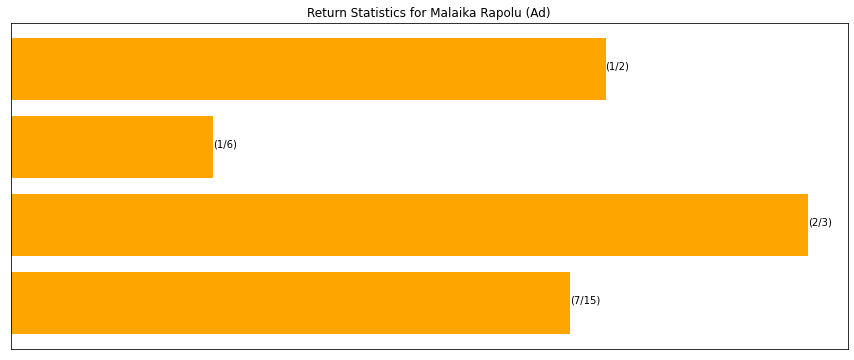

In [116]:
plt.figure(figsize=(15, 6))

plt.barh(categories_ad, values_2_ad, color = 'orange')
plt.title("Return Statistics for " + player_2 + " (Ad)")

plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

for index, value in enumerate(values_2_ad):
    if not np.isnan(value):
        plt.text(value, index, values_2_text_ad[index])

plt.show()

Print out Deuce side return statistics for player 2

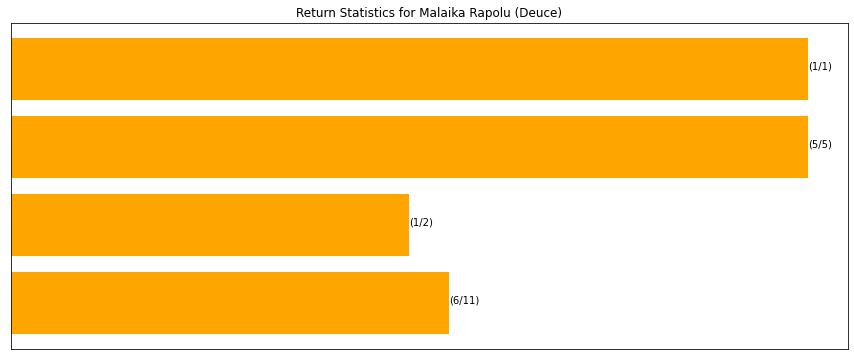

In [115]:
plt.figure(figsize=(15, 6))

plt.barh(categories_deuce, values_2_deuce, color = 'orange')
plt.title("Return Statistics for " + player_2 + " (Deuce)")

plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

for index, value in enumerate(values_2_deuce):
    if not np.isnan(value):
        plt.text(value, index, values_2_text_deuce[index])

plt.show()

Now, let's print out Ad return statistics for player 1

In [102]:
values_1_ad = [x * -1 for x in values_1_ad]
values_1_deuce = [x * -1 for x in values_1_deuce]

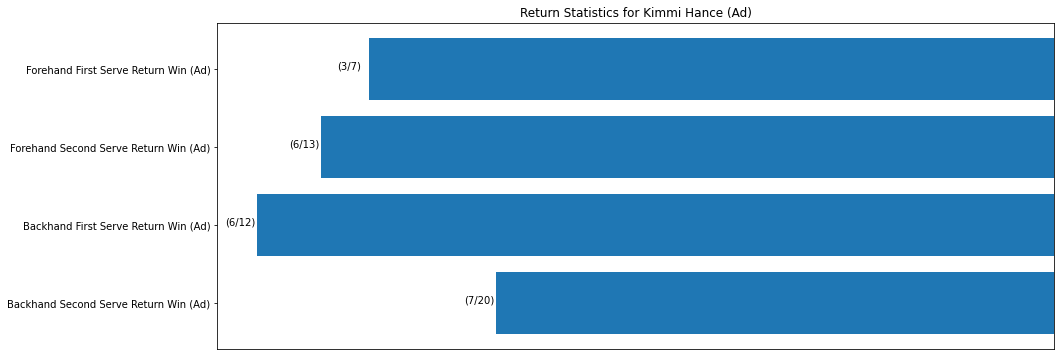

In [114]:
plt.figure(figsize=(15, 6))

plt.barh(categories_ad, values_1_ad)
plt.title("Return Statistics for " + player_1 + " (Ad)")
plt.gca().get_xaxis().set_visible(False)
plt.gca().invert_xaxis()
for index, value in enumerate(values_1_ad):
    if not np.isnan(value):
        plt.text(value + 0.02, index, values_1_text_ad[index])
plt.show()

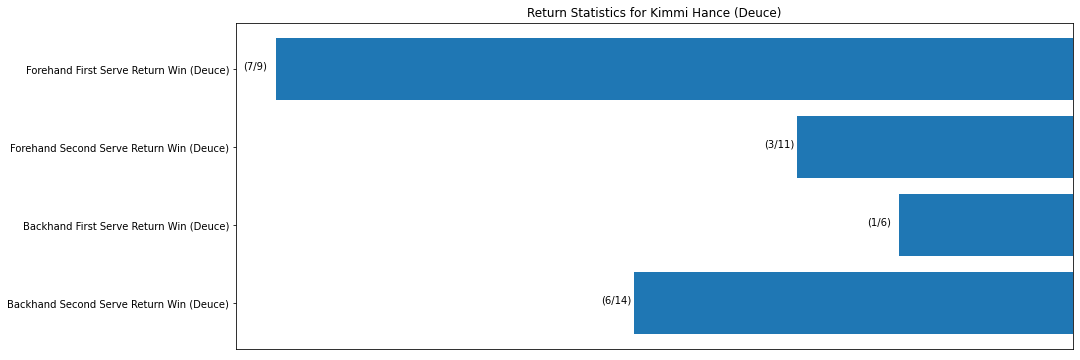

In [120]:
plt.figure(figsize=(15, 6))

plt.barh(categories_deuce, values_1_deuce)
plt.title("Return Statistics for " + player_1 + " (Deuce)")
plt.gca().get_xaxis().set_visible(False)
for index, value in enumerate(values_1_deuce):
    if not np.isnan(value):
        plt.text(value-0.032, index, values_1_text_deuce[index])
plt.show()